## Animal Services Report
### Introduction
### Thesis
### Glossary

In [1]:
# Install matplotlib
import sys
!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install msgpack
!{sys.executable} -m pip install matplotlib
%matplotlib inline

Requirement already up-to-date: pip in /home/kellyrussell/miniconda3/lib/python3.7/site-packages (19.1.1)


In [54]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sizing of charts
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['figure.dpi'] = 80

# Create sqlite database
conn = sqlite3.connect('animal_services.db')
# Read CSV into a variable
animalservices_data = pd.read_csv('louisville_animal_services_data.csv')
# Use as SQL
animalservices_data.to_sql('animalservices_data', conn, if_exists='replace')

In [3]:
# This cell will be my playground for now
pd.read_sql_query("""
    SELECT AnimalType, PrimaryColor FROM animalservices_data
    LIMIT 10;
""", conn)

,AnimalType,PrimaryColor
0,CAT,WHITE
1,CAT,BLACK
2,BIRD,RED
3,OTHER,BROWN
4,DOG,WHITE
5,BIRD,BLACK
6,DOG,BROWN
7,CAT,BROWN TABBY
8,DOG,WHITE
9,CAT,GRAY


In [4]:
# How many different types of animals were brought in?
pd.read_sql_query("""
    SELECT DISTINCT AnimalType as 'Animal Types', 
    COUNT(*) as 'Count' 
    FROM animalservices_data
    GROUP BY AnimalType;
""", conn)

,Animal Types,Count
0,BIRD,1185
1,CAT,68741
2,DOG,77145
3,FERRET,91
4,LIVESTOCK,256
5,OTHER,1341
6,RABBIT,1139
7,REPTILE,263
8,RODENT,681


In [5]:
# Black cat query... don't break mah heart:
pd.read_sql_query("""
    SELECT DISTINCT PrimaryColor as 'Cat Color', 
    COUNT(*) as 'Count' 
    FROM animalservices_data
    GROUP BY PrimaryColor
    ORDER BY Count DESC
    LIMIT 10;
""", conn)

,Cat Color,Count
0,BLACK,42259
1,WHITE,17379
2,BROWN,16764
3,GRAY,11566
4,TAN,7722
5,BROWN TABBY,7015
6,GRAY TABBY,4301
7,CALICO,3980
8,TRICOLOR,3892
9,ORANGE TABBY,3839


In [6]:
# More heart breaking...
pd.read_sql_query("""
    SELECT 
    DISTINCT OutcomeType as 'Outcome', 
    COUNT(*) as 'Count' 
    FROM animalservices_data
    GROUP BY OutcomeType
    ORDER BY Count DESC
    ;
""", conn)

,Outcome,Count
0,EUTH,69662
1,ADOPTION,25724
2,TRANSFER,19223
3,RTO,14468
4,FOSTER,4654
5,RELEASED,3712
6,TNR,3310
7,DIED,2637
8,DISPOSAL,1933
9,TRANSPORT,1668


In [7]:
#OutcomeAsilomarStatus
pd.read_sql_query("""
    SELECT 
    DISTINCT OutcomeAsilomarStatus as 'Status at Outcome', 
    COUNT(*) as 'Count' 
    FROM animalservices_data
    GROUP BY OutcomeAsilomarStatus
    ORDER BY Count DESC
    ;
""", conn)

,Status at Outcome,Count
0,HEALTHY,147485
1,UNHEALTHY/UNTREATABLE,2765
2,TREATABLE/MANAGEABLE,390
3,None,202


In [8]:
# Cat breeds
pd.read_sql_query("""
    SELECT 
    DISTINCT PrimaryBreed as 'Breed', 
    COUNT(*) as 'Count' 
    FROM animalservices_data
    WHERE AnimalType = 'CAT'
    GROUP BY PrimaryBreed
    ORDER BY Count DESC
    LIMIT 10
    ;
""", conn)

,Breed,Count
0,DOMESTIC SHORTHAIR,55161
1,DOMESTIC MEDIUMHAIR,5986
2,DOMESTIC LONGHAIR,3295
3,AMERICAN SHORTHAIR,1607
4,SIAMESE,1281
5,MAINE COON,290
6,RUSSIAN BLUE,156
7,BENGAL,130
8,PERSIAN,129
9,SNOWSHOE,126


In [9]:
# Dog breeds
pd.read_sql_query("""
    SELECT 
    DISTINCT PrimaryBreed as 'Breed', 
    COUNT(*) as 'Count' 
    FROM animalservices_data
    WHERE AnimalType = 'DOG'
    GROUP BY PrimaryBreed
    ORDER BY Count DESC
    LIMIT 10
    ;
""", conn)

,Breed,Count
0,PIT BULL TERRIER,14911
1,LABRADOR RETRIEVER,9615
2,GERMAN SHEPHERD DOG,5495
3,BEAGLE,5347
4,BOXER,2897
5,CHIHUAHUA - SMOOTH COATED,2621
6,AMERICAN PIT BULL TERRIER,2312
7,ROTTWEILER,2264
8,CHOW CHOW,2203
9,BORDER COLLIE,1635


In [32]:
# Top 10 IntakeReason per Cat
# This does not include the many rows that are 'None'
catIntake = pd.read_sql_query("""
    SELECT 
    DISTINCT IntakeReason as 'Intake Reason', 
    COUNT(*) as 'Count' 
    FROM animalservices_data
    WHERE AnimalType = 'CAT' AND IntakeReason != 'None'
    GROUP BY IntakeReason
    ORDER BY Count DESC
    LIMIT 10
    ;
""", conn)

In [21]:
# Top 10 IntakeReason per Dog
# This does not include the many rows that are 'None'
dogIntake = pd.read_sql_query("""
    SELECT 
    DISTINCT IntakeReason as 'Intake Reason', 
    COUNT(*) as 'Count' 
    FROM animalservices_data
    WHERE AnimalType = 'DOG' AND IntakeReason != 'None'
    GROUP BY IntakeReason
    ORDER BY Count DESC
    LIMIT 10
    ;
""", conn)
dogIntake

,Intake Reason,Count
0,STRAY,5410
1,MOVE,1289
2,COST,1151
3,OWNER PROB,1051
4,LANDLORD,837
5,NO TIME,626
6,TOO MANY,532
7,BITES,474
8,AGG ANIMAL,473
9,ILL,462


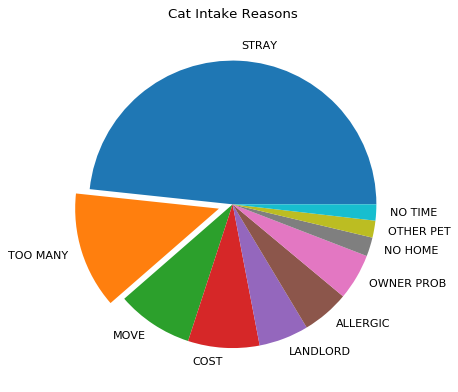

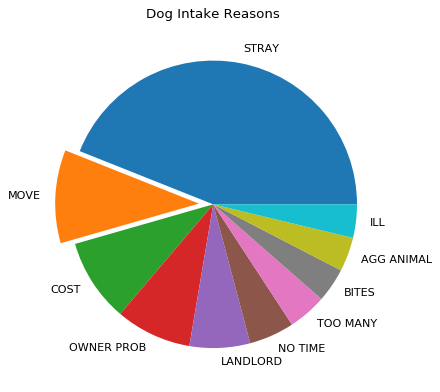

In [57]:
# Pie chart for cat intake reasons
labels = catIntake["Intake Reason"]
catCount = catIntake["Count"]
explode = (0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0)
plt.pie(catCount, labels=labels, explode=explode)
plt.title("Cat Intake Reasons")
plt.tight_layout()
plt.show()

# Pie chart for dog intake reasons
labels = dogIntake["Intake Reason"]
dogCount = dogIntake["Count"]
explode = (0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0)
plt.pie(dogCount, labels=labels, explode=explode)
plt.title("Dog Intake Reasons")
plt.tight_layout()
plt.show()

### Analysis
### Conclusion